In [32]:
%%writefile file2.py

UsageError: %%writefile is a cell magic, but the cell body is empty.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import random

In [42]:
class DataProcessor:
    def __init__(self, file_name):
        """
        Initializes the DataProcessor with the file name and loads the data.

        Parameters:
        file_name (str): The name of the file to load.
        """
        self.file_name = file_name
        self.df = self.load_data()

    def load_data(self):
        """
        Loads data from a file into a DataFrame. Supports Excel and CSV files.

        Returns:
        DataFrame: The loaded data.
        """
        if ".xlsx" in self.file_name:
            df = pd.read_excel(self.file_name)
        else:
            df = pd.read_csv(self.file_name)
        return df

    def clean_data(self):
        """
        Cleans the DataFrame by removing columns with names that start with 'Unnamed'.

        Returns:
        DataFrame: The cleaned DataFrame.
        """
        self.df = self.df.filter(regex='^(?!Unnamed)')
        return self.df

    def handle_missing_data(self, subset_column=""):
        """
        Handles missing data by dropping rows with missing values.

        Parameters:
        subset_column (str): The column to consider for missing values. If empty, considers all columns.

        Returns:
        DataFrame: The DataFrame with missing values handled.
        """
        if subset_column == "":
            self.df.dropna(inplace=True)
        else:
            self.df.dropna(subset=[subset_column], inplace=True)
        return self.df

    def handle_duplicates(self, subset_column=""):
        """
        Handles duplicate values in the DataFrame.

        Parameters:
        subset_column (str): The column to check for duplicates. If empty, considers all columns.

        Returns:
        DataFrame: The DataFrame with duplicates handled.
        """
        if subset_column == "":
            self.df = self.df[~self.df.duplicated()]
        else:
            # Get duplicate values
            duplicates = self.df[self.df.duplicated(subset=[subset_column], keep=False)]
            
            # Generate a dictionary to map original duplicate values to new random 9-digit numbers
            replacement_dict = {val: random.randint(100000000, 999999999) for val in duplicates[subset_column].unique()}
            
            # Replace duplicates with new random 9-digit numbers
            self.df[subset_column] = self.df[subset_column].replace(replacement_dict)
            
        return self.df

    def add_labeled_data(self, label_data, merge_column):
        """
        Adds labels to the DataFrame by merging with another DataFrame.

        Parameters:
        label_data (DataFrame): The DataFrame containing the labels.
        merge_column (str): The column name to use for merging.

        Returns:
        DataFrame: The merged DataFrame with labels added.
        """
        label_df = pd.DataFrame(label_data)
        self.df = pd.merge(self.df, label_df, how='left', left_on=merge_column, right_on=merge_column)
        return self.df

    def add_multiple_labels(self, label_data_dict):
        """
        Adds multiple labels to the DataFrame by merging with several label DataFrames.

        Parameters:
        label_data_dict (dict): A dictionary where keys are column names and values are label DataFrames.

        Returns:
        DataFrame: The DataFrame with all labels added.
        """
        for merge_column, label_data in label_data_dict.items():
            self.add_labeled_data(label_data, merge_column)
        return self.df

    def create_dataframe(self):
        """
        Creates a new DataFrame from the existing one.

        Returns:
        DataFrame: The new DataFrame.
        """
        return pd.DataFrame(self.df)

# label data dictionaries
education_labels = {
    'Education': [1, 2, 3, 4, 5, 6, 7, 8],
    'Education_Label': [
        'No formal education',
        'Primary school',
        'Secondary school',
        'High school diploma or equivalent (e.g., GED)',
        'Some college or vocational training',
        'Bachelor\'s degree',
        'Master\'s degree',
        'Doctorate or professional degree'
    ]
}

income_labels = {
    'Income': [1, 2, 3, 4, 5, 6, 7],
    'Income_Label': [
        'up to 5k',
        '5k - 10k',
        '10k-20k',
        '20k-40k',
        '40k-60k',
        '60k-80k',
        '80k+'
    ]
}

gender_labels = {
    'Gender': [1, 2],
    'Gender_Label': ['Male', 'Female']
}

family_status_labels = {
    'Family status': [1, 2, 3, 4, 5, 6],
    'Family_Status_Label': [
        'Single',
        'Married',
        'Divorced',
        'Widowed',
        'Separated',
        'Domestic Partnership/Civil Union'
    ]
}

age_labels = {
    'Age': [1, 2, 3, 4, 5, 6],
    'Age_Label': [
        '18-25',
        '25-35',
        '35-45',
        '45-55',
        '55-65',
        '65+'
    ]
}

# Combined label data dictionary
label_data_dict = {
    'Education': education_labels,
    'Income': income_labels,
    'Gender': gender_labels,
    'Family status': family_status_labels,
    'Age': age_labels
}

processor = DataProcessor('Data V1.xlsx')
processor.clean_data()
processor.handle_missing_data()
processor.handle_duplicates('Customer ID')
processor.add_multiple_labels(label_data_dict)

,Customer ID,Education,Income,Gender,Family status,Age,Confectionary Shopping Value 2022,Confectionary Shopping Value 2023,Coffee Shopping Value 2022,Coffee Shopping Value 2023,Education_Label,Income_Label,Gender_Label,Family_Status_Label,Age_Label
0,85039733,4,2,2,6,1,61.5,51.4,69.9,68.0,"High school diploma or equivalent (e.g., GED)",5k - 10k,Female,Domestic Partnership/Civil Union,18-25
1,91390189,7,5,1,1,1,75.7,70.5,83.9,84.3,Master's degree,40k-60k,Male,Single,18-25
2,93641370,5,6,2,3,6,53.8,63.4,69.7,70.5,Some college or vocational training,60k-80k,Female,Divorced,65+
3,93893118,3,3,2,6,5,44.1,48.9,51.5,53.1,Secondary school,10k-20k,Female,Domestic Partnership/Civil Union,55-65
4,94126676,4,4,1,2,6,54.6,45.1,54.2,55.4,"High school diploma or equivalent (e.g., GED)",20k-40k,Male,Married,65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,150749634,2,2,2,1,4,36.4,37.2,51.6,50.4,Primary school,5k - 10k,Female,Single,45-55
596,151726067,2,3,1,3,2,55.5,59.4,71.2,68.9,Primary school,10k-20k,Male,Divorced,25-35
597,152313237,4,3,1,6,4,48.5,49.2,61.7,66.2,"High school diploma or equivalent (e.g., GED)",10k-20k,Male,Domestic Partnership/Civil Union,45-55
598,154429085,5,5,2,2,5,62.6,55.6,69.9,71.0,Some college or vocational training,40k-60k,Female,Married,55-65


In [44]:
processor.df

,Customer ID,Education,Income,Gender,Family status,Age,Confectionary Shopping Value 2022,Confectionary Shopping Value 2023,Coffee Shopping Value 2022,Coffee Shopping Value 2023,Education_Label,Income_Label,Gender_Label,Family_Status_Label,Age_Label
0,85039733,4,2,2,6,1,61.5,51.4,69.9,68.0,"High school diploma or equivalent (e.g., GED)",5k - 10k,Female,Domestic Partnership/Civil Union,18-25
1,91390189,7,5,1,1,1,75.7,70.5,83.9,84.3,Master's degree,40k-60k,Male,Single,18-25
2,93641370,5,6,2,3,6,53.8,63.4,69.7,70.5,Some college or vocational training,60k-80k,Female,Divorced,65+
3,93893118,3,3,2,6,5,44.1,48.9,51.5,53.1,Secondary school,10k-20k,Female,Domestic Partnership/Civil Union,55-65
4,94126676,4,4,1,2,6,54.6,45.1,54.2,55.4,"High school diploma or equivalent (e.g., GED)",20k-40k,Male,Married,65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,150749634,2,2,2,1,4,36.4,37.2,51.6,50.4,Primary school,5k - 10k,Female,Single,45-55
596,151726067,2,3,1,3,2,55.5,59.4,71.2,68.9,Primary school,10k-20k,Male,Divorced,25-35
597,152313237,4,3,1,6,4,48.5,49.2,61.7,66.2,"High school diploma or equivalent (e.g., GED)",10k-20k,Male,Domestic Partnership/Civil Union,45-55
598,154429085,5,5,2,2,5,62.6,55.6,69.9,71.0,Some college or vocational training,40k-60k,Female,Married,55-65


In [45]:
df = pd.read_excel('Data V1.xlsx')

In [46]:
df = df.filter(regex='^(?!Unnamed)')
df.columns

Index(['Customer ID', 'Education', 'Income', 'Gender', 'Family status', 'Age',
       'Confectionary Shopping Value 2022',
       'Confectionary Shopping Value 2023', 'Coffee Shopping Value 2022',
       'Coffee Shopping Value 2023'],
      dtype='object')

In [48]:
education_labels = {
    'Education': [1, 2, 3, 4, 5, 6, 7, 8],
    'Education_Label': [
        'No formal education',
        'Primary school',
        'Secondary school',
        'High school diploma or equivalent (e.g., GED)',
        'Some college or vocational training',
        'Bachelor\'s degree',
        'Master\'s degree',
        'Doctorate or professional degree'
    ]
}

income_labels = {
    'Income': [1, 2, 3, 4, 5, 6, 7],
    'Income_Label': [
        'up to 5k',
        '5k - 10k',
        '10k-20k',
        '20k-40k',
        '40k-60k',
        '60k-80k',
        '80k+'
    ]
}

gender_labels = {
    'Gender': [1, 2],
    'Gender_Label': ['Male', 'Female']
}

family_status_labels = {
    'Family status': [1, 2, 3, 4, 5, 6],
    'Family_Status_Label': [
        'Single',
        'Married',
        'Divorced',
        'Widowed',
        'Separated',
        'Domestic Partnership/Civil Union'
    ]
}

age_labels = {
    'Age': [1, 2, 3, 4, 5, 6],
    'Age_Label': [
        '18-25',
        '25-35',
        '35-45',
        '45-55',
        '55-65',
        '65+'
    ]
}


In [49]:
merged_df =  df.copy()

In [53]:
duplicate_values = merged_df[merged_df.duplicated(subset='Customer ID')]

In [56]:
merged_df[merged_df.duplicated()]

,Customer ID,Education,Income,Gender,Family status,Age,Confectionary Shopping Value 2022,Confectionary Shopping Value 2023,Coffee Shopping Value 2022,Coffee Shopping Value 2023


In [57]:
merged_df[~merged_df.duplicated(subset='Customer ID')]

,Customer ID,Education,Income,Gender,Family status,Age,Confectionary Shopping Value 2022,Confectionary Shopping Value 2023,Coffee Shopping Value 2022,Coffee Shopping Value 2023
0,85039733,4,2,2,6,1,61.5,51.4,69.9,68.0
1,91390189,7,5,1,1,1,75.7,70.5,83.9,84.3
2,93641370,5,6,2,3,6,53.8,63.4,69.7,70.5
3,93893118,3,3,2,6,5,44.1,48.9,51.5,53.1
4,94126676,4,4,1,2,6,54.6,45.1,54.2,55.4
...,...,...,...,...,...,...,...,...,...,...
595,150749634,2,2,2,1,4,36.4,37.2,51.6,50.4
596,151726067,2,3,1,3,2,55.5,59.4,71.2,68.9
597,152313237,4,3,1,6,4,48.5,49.2,61.7,66.2
598,154429085,5,5,2,2,5,62.6,55.6,69.9,71.0


In [58]:
merged_d = merged_df.dropna()
merged_d

,Customer ID,Education,Income,Gender,Family status,Age,Confectionary Shopping Value 2022,Confectionary Shopping Value 2023,Coffee Shopping Value 2022,Coffee Shopping Value 2023
0,85039733,4,2,2,6,1,61.5,51.4,69.9,68.0
1,91390189,7,5,1,1,1,75.7,70.5,83.9,84.3
2,93641370,5,6,2,3,6,53.8,63.4,69.7,70.5
3,93893118,3,3,2,6,5,44.1,48.9,51.5,53.1
4,94126676,4,4,1,2,6,54.6,45.1,54.2,55.4
...,...,...,...,...,...,...,...,...,...,...
595,150749634,2,2,2,1,4,36.4,37.2,51.6,50.4
596,151726067,2,3,1,3,2,55.5,59.4,71.2,68.9
597,152313237,4,3,1,6,4,48.5,49.2,61.7,66.2
598,154429085,5,5,2,2,5,62.6,55.6,69.9,71.0


In [59]:
merged_df[merged_df['Customer ID'] == 109734378]

,Customer ID,Education,Income,Gender,Family status,Age,Confectionary Shopping Value 2022,Confectionary Shopping Value 2023,Coffee Shopping Value 2022,Coffee Shopping Value 2023
47,109734378,4,5,1,6,5,60.2,64.5,67.5,65.8
48,109734378,6,2,2,2,2,50.6,47.4,65.7,57.5


In [61]:
# # Extract the relevant columns
# confectionary_2022 = merged_df['Confectionary Shopping Value 2022']
# confectionary_2023 = merged_df['Confectionary Shopping Value 2023']
# coffee_2022 = merged_df['Coffee Shopping Value 2022']
# coffee_2023 = merged_df['Coffee Shopping Value 2023']

# # Create a DataFrame for plotting
# plot_data = pd.DataFrame({
#     'Confectionary 2022': confectionary_2022,
#     'Confectionary 2023': confectionary_2023,
#     'Coffee 2022': coffee_2022,
#     'Coffee 2023': coffee_2023
# })

# # Create a long-form DataFrame for seaborn
# long_form_data = pd.melt(plot_data.reset_index(), id_vars=['index'], value_vars=plot_data.columns)
# long_form_data.columns = ['index', 'Category', 'Value']

# # Plotting with seaborn to ensure each box has a distinct color
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='Category', y='Value', data=long_form_data, palette=['lightgreen', 'lightgreen', 'lightcoral', 'lightcoral'])
# plt.title('Shopping Values for Confectionary and Coffee (2022 and 2023)')
# plt.ylabel('Shopping Value')
# plt.xticks(rotation=45)
# plt.show()

In [62]:
# # Extract the relevant columns
# confectionary_2022 = merged_df['Confectionary Shopping Value 2022']
# confectionary_2023 = merged_df['Confectionary Shopping Value 2023']
# coffee_2022 = merged_df['Coffee Shopping Value 2022']
# coffee_2023 = merged_df['Coffee Shopping Value 2023']

# # Create a DataFrame for plotting
# plot_data = pd.DataFrame({
#     'Confectionary 2022': confectionary_2022,
#     'Confectionary 2023': confectionary_2023,
#     'Coffee 2022': coffee_2022,
#     'Coffee 2023': coffee_2023
# })

# # Create a long-form DataFrame for seaborn
# long_form_data = pd.melt(plot_data.reset_index(), id_vars=['index'], value_vars=plot_data.columns)
# long_form_data.columns = ['index', 'Category', 'Value']

# # Plotting with seaborn to ensure each box has a distinct color
# plt.figure(figsize=(12, 8))
# box_plot = sns.boxplot(x='Category', y='Value', data=long_form_data, palette=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])

# # Calculate and annotate statistics
# for category in plot_data.columns:
#     category_data = plot_data[category]
#     median = category_data.median()
#     mean = category_data.mean()
#     quantiles = category_data.quantile([0.25, 0.75])
    
#     category_index = list(plot_data.columns).index(category)
    
#     plt.text(category_index, median, f'Median: {median:.2f}', 
#              horizontalalignment='center', verticalalignment='bottom', 
#              size='medium', color='black', weight='semibold', 
#              bbox=dict(facecolor='white', alpha=0.6))
    
#     plt.text(category_index, mean, f'Mean: {mean:.2f}', 
#              horizontalalignment='center', verticalalignment='top', 
#              size='medium', color='blue', weight='semibold', 
#              bbox=dict(facecolor='white', alpha=0.6))
    
#     plt.text(category_index, quantiles.iloc[0], f'Q1: {quantiles.iloc[0]:.2f}', 
#              horizontalalignment='center', verticalalignment='top', 
#              size='medium', color='green', weight='semibold', 
#              bbox=dict(facecolor='white', alpha=0.6))
    
#     plt.text(category_index, quantiles.iloc[1], f'Q3: {quantiles.iloc[1]:.2f}', 
#              horizontalalignment='center', verticalalignment='bottom', 
#              size='medium', color='green', weight='semibold', 
#              bbox=dict(facecolor='white', alpha=0.6))

# plt.title('Box Plot of Shopping Values for Confectionary and Coffee (2022 and 2023)')
# plt.ylabel('Shopping Value')
# plt.xticks(rotation=45)
# plt.show()

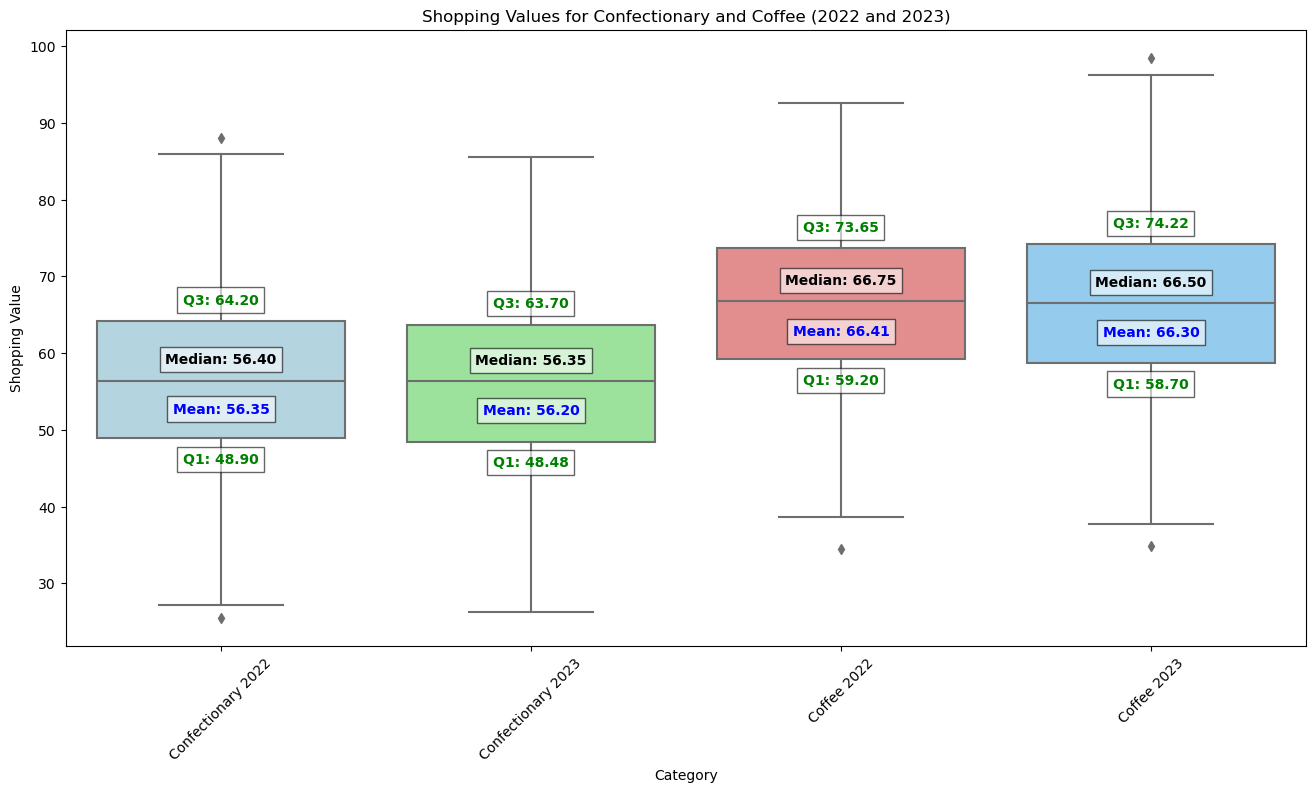

In [64]:
# Extract the relevant columns
confectionary_2022 = merged_df['Confectionary Shopping Value 2022']
confectionary_2023 = merged_df['Confectionary Shopping Value 2023']
coffee_2022 = merged_df['Coffee Shopping Value 2022']
coffee_2023 = merged_df['Coffee Shopping Value 2023']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Confectionary 2022': confectionary_2022,
    'Confectionary 2023': confectionary_2023,
    'Coffee 2022': coffee_2022,
    'Coffee 2023': coffee_2023
})

# Create a long-form DataFrame for seaborn
long_form_data = pd.melt(plot_data.reset_index(), id_vars=['index'], value_vars=plot_data.columns)
long_form_data.columns = ['index', 'Category', 'Value']

# Plotting with seaborn to ensure each box has a distinct color
plt.figure(figsize=(16, 8))
box_plot = sns.boxplot(x='Category', y='Value', data=long_form_data, palette=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])

# Calculate and annotate statistics
for category in plot_data.columns:
    category_data = plot_data[category]
    median = category_data.median()
    mean = category_data.mean()
    quantiles = category_data.quantile([0.25, 0.75])
    
    category_index = list(plot_data.columns).index(category)
    
    plt.annotate(f'Median: {median:.2f}', 
                 xy=(category_index, median), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center', 
                 va='bottom', 
                 size='medium', 
                 color='black', 
                 weight='semibold',
                 bbox=dict(facecolor='white', alpha=0.6))
    
    plt.annotate(f'Mean: {mean:.2f}', 
                 xy=(category_index, mean), 
                 xytext=(0, -15), 
                 textcoords='offset points',
                 ha='center', 
                 va='top', 
                 size='medium', 
                 color='blue', 
                 weight='semibold',
                 bbox=dict(facecolor='white', alpha=0.6))
    
    plt.annotate(f'Q1: {quantiles.iloc[0]:.2f}', 
                 xy=(category_index, quantiles.iloc[0]), 
                 xytext=(0, -10), 
                 textcoords='offset points',
                 ha='center', 
                 va='top', 
                 size='medium', 
                 color='green', 
                 weight='semibold',
                 bbox=dict(facecolor='white', alpha=0.6))
    
    plt.annotate(f'Q3: {quantiles.iloc[1]:.2f}', 
                 xy=(category_index, quantiles.iloc[1]), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center', 
                 va='bottom', 
                 size='medium', 
                 color='green', 
                 weight='semibold',
                 bbox=dict(facecolor='white', alpha=0.6))

plt.title('Shopping Values for Confectionary and Coffee (2022 and 2023)')
plt.ylabel('Shopping Value')
plt.xticks(rotation=45)
plt.show()

In [65]:
merged_df

,Customer ID,Education,Income,Gender,Family status,Age,Confectionary Shopping Value 2022,Confectionary Shopping Value 2023,Coffee Shopping Value 2022,Coffee Shopping Value 2023
0,85039733,4,2,2,6,1,61.5,51.4,69.9,68.0
1,91390189,7,5,1,1,1,75.7,70.5,83.9,84.3
2,93641370,5,6,2,3,6,53.8,63.4,69.7,70.5
3,93893118,3,3,2,6,5,44.1,48.9,51.5,53.1
4,94126676,4,4,1,2,6,54.6,45.1,54.2,55.4
...,...,...,...,...,...,...,...,...,...,...
595,150749634,2,2,2,1,4,36.4,37.2,51.6,50.4
596,151726067,2,3,1,3,2,55.5,59.4,71.2,68.9
597,152313237,4,3,1,6,4,48.5,49.2,61.7,66.2
598,154429085,5,5,2,2,5,62.6,55.6,69.9,71.0


In [67]:
X[['Gender_Label', 'Family_Status_Label']]


NameError: name 'X' is not defined

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data = merged_df.copy()

# Data preparation: Calculate total shopping spent for 2022 and 2023
data['Total Shopping Value 2022'] = data['Confectionary Shopping Value 2022'] + data['Coffee Shopping Value 2022']
data['Total Shopping Value 2023'] = data['Confectionary Shopping Value 2023'] + data['Coffee Shopping Value 2023']

# Combine the total shopping values
data['Total Shopping Value'] = data['Total Shopping Value 2022'] + data['Total Shopping Value 2023']

# Selecting features and target variable
features = ['Education', 'Income', 'Gender_Label','Family_Status_Label', 'Age']
X = data[features]
y = data['Total Shopping Value']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[['Gender_Label','Family_Status_Label']])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Gender_Label','Family_Status_Label']))
X = X.drop(['Gender_Label','Family_Status_Label'], axis=1)
X = pd.concat([X, X_encoded_df], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training and evaluation with Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Model training and evaluation with Random Forest Regression
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Model training and evaluation with Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Model training and evaluation with Support Vector Machines (SVM)
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)

# Evaluating Linear Regression model
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Evaluating Random Forest Regression model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Evaluating Decision Tree Regression model
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

# Evaluating Support Vector Machines (SVM) model
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_mse = mean_squared_error(y_test, y_pred_svm)
svm_r2 = r2_score(y_test, y_pred_svm)

# Feature importances from Decision Tree
feature_importances_rf = rf_reg.feature_importances_
feature_importances_dt = dt_reg.feature_importances_

# Creating a summary of the evaluation metrics and feature importances for all models
evaluation_metrics = {
    'Model': ['Linear Regression', 'Random Forest Regression', 'Decision Tree Regression', 'Support Vector Machines (SVM)'],
    'MAE': [linear_mae, rf_mae, dt_mae, svm_mae],
    'MSE': [linear_mse, rf_mse, dt_mse, svm_mse],
    'R2 Score': [linear_r2, rf_r2, dt_r2, svm_r2]
}

feature_importances_summary = pd.DataFrame({
    'Feature': X.columns,
    'Importance_decision_tree': feature_importances_rf,
    'Importance_random_forest': feature_importances_dt
}).sort_values(by='Importance_random_forest', ascending=False)

# Creating a DataFrame
em = pd.DataFrame(evaluation_metrics)

display(em,feature_importances_summary)

# Plotting feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_summary['Feature'], feature_importances_summary['Importance_random_forest'], color='skyblue')
plt.xlabel('Importance_random_forest')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the largest importance on top
plt.grid(True)
plt.show()

KeyError: "['Gender_Label', 'Family_Status_Label'] not in index"

In [ ]:
import statsmodels.api as sm

# Prepare the data
X = data[['Age_Label','Education_Label','Income_Label','Gender_Label','Family_Status_Label']]
y = data['Total Shopping Value']

# One-hot encode categorical variables if necessary (assuming 'Gender' and 'Family status' are categorical)
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[['Age_Label','Education_Label','Income_Label','Gender_Label','Family_Status_Label']])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Age_Label','Education_Label','Income_Label','Gender_Label','Family_Status_Label']))
X = X.drop(['Age_Label','Education_Label','Income_Label','Gender_Label','Family_Status_Label'], axis=1)
X = pd.concat([X, X_encoded_df], axis=1)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Get the coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Creating a summary dataframe
summary_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'P-Value': p_values
})

# Display the summary
summary_df

In [ ]:
data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting features for clustering
clustering_features = ['Education', 'Income', 'Gender', 'Family status', 'Age',
                       'Confectionary Shopping Value 2022', 'Confectionary Shopping Value 2023',
                       'Coffee Shopping Value 2022', 'Coffee Shopping Value 2023']

X_clustering = data[clustering_features]

# One-hot encode categorical variables if necessary (assuming 'Gender' and 'Family status' are categorical)
X_clustering_encoded = encoder.fit_transform(X_clustering[['Gender', 'Family status']])
X_clustering_encoded_df = pd.DataFrame(X_clustering_encoded, columns=encoder.get_feature_names_out(['Gender', 'Family status']))
X_clustering = X_clustering.drop(['Gender', 'Family status'], axis=1)
X_clustering = pd.concat([X_clustering, X_clustering_encoded_df], axis=1)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Fit the K-means model with the optimal number of clusters (assuming 4 based on typical elbow plots)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Profiling the segments
segment_profiles = data.groupby('Cluster').mean()

In [ ]:
segment_profiles

In [ ]:
# Creating a DataFrame
em = pd.DataFrame(evaluation_metrics)
em

In [ ]:
df.groupby('Gender')[['Coffee Shopping Value 2022','Coffee Shopping Value 2023']].describe()

In [ ]:
df.groupby('Family status')[['Coffee Shopping Value 2022','Coffee Shopping Value 2023']].describe()

In [ ]:
df.groupby('Age')[['Coffee Shopping Value 2022','Coffee Shopping Value 2023']].describe()

In [ ]:
# Calculate statistics
mu, std = norm.fit(df['Confectionary Shopping Value 2022'])
percentiles = np.percentile(df['Confectionary Shopping Value 2022'], [25, 50, 75])
mean = df['Confectionary Shopping Value 2022'].mean()

# Plot the distribution of the values in the column
sns.histplot(df['Confectionary Shopping Value 2022'], kde=True, stat="density", linewidth=0)

# Plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add lines for percentiles and average
colors = ['red', 'green', 'blue', 'purple']
labels = ['25th Percentile', '50th Percentile', '75th Percentile', 'Mean']
values = np.append(percentiles, mean)

for perc, color, label in zip(values, colors, labels):
    plt.axvline(perc, color=color, linestyle='--', linewidth=1.5, label=f'{label}: {perc:.2f}')
    plt.text(perc, plt.ylim()[1] * 0.9, f'{perc:.2f}', color=color, ha='center')

# Add titles and labels
plt.title('Histogram and Normal Distribution Fit with Percentiles and Mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Calculate statistics
mu, std = norm.fit(df['Confectionary Shopping Value 2023'])
percentiles = np.percentile(df['Confectionary Shopping Value 2023'], [25, 50, 75])
mean = df['Confectionary Shopping Value 2023'].mean()

# Plot the distribution of the values in the column
sns.histplot(df['Confectionary Shopping Value 2023'], kde=True, stat="density", linewidth=0)

# Plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add lines for percentiles and average
colors = ['red', 'green', 'blue', 'purple']
labels = ['25th Percentile', '50th Percentile', '75th Percentile', 'Mean']
values = np.append(percentiles, mean)

for perc, color, label in zip(values, colors, labels):
    plt.axvline(perc, color=color, linestyle='--', linewidth=1.5, label=f'{label}: {perc:.2f}')
    plt.text(perc, plt.ylim()[1] * 0.9, f'{perc:.2f}', color=color, ha='center')

# Add titles and labels
plt.title('Histogram and Normal Distribution Fit with Percentiles and Mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

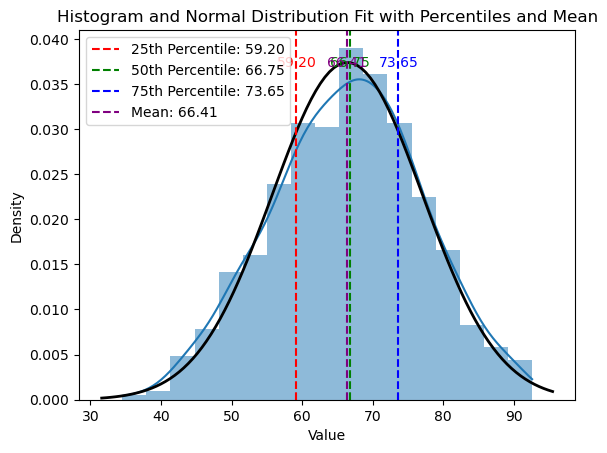

In [91]:
# Calculate statistics
mu, std = norm.fit(df['Coffee Shopping Value 2022'])
percentiles = np.percentile(df['Coffee Shopping Value 2022'], [25, 50, 75])
mean = df['Coffee Shopping Value 2022'].mean()

# Plot the distribution of the values in the column
sns.histplot(df['Coffee Shopping Value 2022'], kde=True, stat="density", linewidth=0)

# Plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add lines for percentiles and average
colors = ['red', 'green', 'blue', 'purple']
labels = ['25th Percentile', '50th Percentile', '75th Percentile', 'Mean']
values = np.append(percentiles, mean)

for perc, color, label in zip(values, colors, labels):
    plt.axvline(perc, color=color, linestyle='--', linewidth=1.5, label=f'{label}: {perc:.2f}')
    plt.text(perc, plt.ylim()[1] * 0.9, f'{perc:.2f}', color=color, ha='center')

# Add titles and labels
plt.title('Histogram and Normal Distribution Fit with Percentiles and Mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

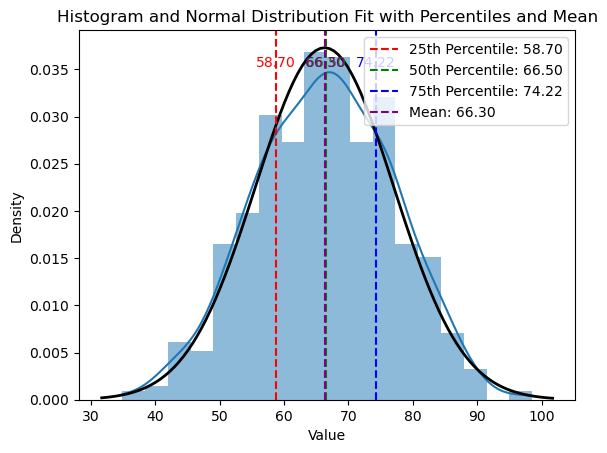

In [92]:
# Calculate statistics
mu, std = norm.fit(df['Coffee Shopping Value 2023'])
percentiles = np.percentile(df['Coffee Shopping Value 2023'], [25, 50, 75])
mean = df['Coffee Shopping Value 2023'].mean()

# Plot the distribution of the values in the column
sns.histplot(df['Coffee Shopping Value 2023'], kde=True, stat="density", linewidth=0)

# Plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add lines for percentiles and average
colors = ['red', 'green', 'blue', 'purple']
labels = ['25th Percentile', '50th Percentile', '75th Percentile', 'Mean']
values = np.append(percentiles, mean)

for perc, color, label in zip(values, colors, labels):
    plt.axvline(perc, color=color, linestyle='--', linewidth=1.5, label=f'{label}: {perc:.2f}')
    plt.text(perc, plt.ylim()[1] * 0.9, f'{perc:.2f}', color=color, ha='center')

# Add titles and labels
plt.title('Histogram and Normal Distribution Fit with Percentiles and Mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [94]:
df.groupby('Education')[['Coffee Shopping Value 2022','Coffee Shopping Value 2023']].describe()

Coffee Shopping Value 2022                                      \
                               count       mean        std   min     25%   
Education                                                                  
1                                6.0  55.300000   9.281164  44.9  47.925   
2                               30.0  57.890000   7.308632  43.7  53.450   
3                               78.0  61.602564  11.767763  34.5  52.300   
4                              120.0  65.118333   9.879135  38.6  58.500   
5                              138.0  68.478261  10.970277  45.2  59.925   
6                              128.0  67.166406   9.484719  42.4  61.500   
7                               93.0  71.493548   9.170615  46.9  65.400   
8                                7.0  66.314286   8.699316  52.3  61.450   

                               Coffee Shopping Value 2023             \
             50%     75%   max                      count       mean   
Education                                                              
1          54.00  63.225  66.7                        6.0  55.350000   
2          58.25  61.375  78.5                       30.0  56.920000   
3          63.00  69.800  87.6                       78.0  61.853846   
4          65.30  72.000  87.1                      120.0  65.161667   
5          68.95  76.425  92.6                      138.0  68.555072   
6          66.95  72.525  91.6                      128.0  67.046875   
7          72.90  76.500  91.4                       93.0  70.941935   
8          67.90  71.350  78.4                        7.0  65.342857   

                                                         
                 std   min     25%    50%     75%   max  
Education                                                
1           7.753386  44.5  51.225  54.70  60.575  65.6  
2           7.796569  44.4  50.100  55.75  62.325  74.2  
3          11.543927  34.9  54.875  61.05  70.400  86.1  
4           9.422654  41.4  58.800  65.45  72.125  84.2  
5          10.951533  41.5  61.050  69.65  76.175  90.8  
6           9.813328  39.1  60.525  67.55  73.725  96.2  
7           9.496159  46.6  64.400  70.70  77.500  98.5  
8          12.611352  50.5  52.700  72.80  76.050  76.6

In [105]:
df.groupby(['Education','Income','Gender','Family status','Age'])[['Coffee Shopping Value 2022','Coffee Shopping Value 2023']].describe()

Coffee Shopping Value 2022        \
                                                               count  mean   
Education Income Gender Family status Age                                    
1         1      1      1             1                          1.0  57.6   
                                      3                          1.0  47.1   
                 2      2             4                          1.0  44.9   
          2      1      3             1                          1.0  66.7   
                 2      2             5                          1.0  50.4   
...                                                              ...   ...   
8         4      2      2             6                          1.0  63.8   
                        6             3                          1.0  71.4   
          5      1      2             4                          1.0  67.9   
                        3             3                          1.0  78.4   
          6      2      5             4                          1.0  71.3   

                                                                             \
                                          std   min   25%   50%   75%   max   
Education Income Gender Family status Age                                     
1         1      1      1             1   NaN  57.6  57.6  57.6  57.6  57.6   
                                      3   NaN  47.1  47.1  47.1  47.1  47.1   
                 2      2             4   NaN  44.9  44.9  44.9  44.9  44.9   
          2      1      3             1   NaN  66.7  66.7  66.7  66.7  66.7   
                 2      2             5   NaN  50.4  50.4  50.4  50.4  50.4   
...                                        ..   ...   ...   ...   ...   ...   
8         4      2      2             6   NaN  63.8  63.8  63.8  63.8  63.8   
                        6             3   NaN  71.4  71.4  71.4  71.4  71.4   
          5      1      2             4   NaN  67.9  67.9  67.9  67.9  67.9   
                        3             3   NaN  78.4  78.4  78.4  78.4  78.4   
          6      2      5             4   NaN  71.3  71.3  71.3  71.3  71.3   

                                          Coffee Shopping Value 2023        \
                                                               count  mean   
Education Income Gender Family status Age                                    
1         1      1      1             1                          1.0  58.1   
                                      3                          1.0  44.5   
                 2      2             4                          1.0  51.3   
          2      1      3             1                          1.0  65.6   
                 2      2             5                          1.0  51.2   
...                                                              ...   ...   
8         4      2      2             6                          1.0  53.8   
                        6             3                          1.0  76.6   
          5      1      2             4                          1.0  75.7   
                        3             3                          1.0  76.4   
          6      2      5             4                          1.0  72.8   

                                                                             
                                          std   min   25%   50%   75%   max  
Education Income Gender Family status Age                                    
1         1      1      1             1   NaN  58.1  58.1  58.1  58.1  58.1  
                                      3   NaN  44.5  44.5  44.5  44.5  44.5  
                 2      2             4   NaN  51.3  51.3  51.3  51.3  51.3  
          2      1      3             1   NaN  65.6  65.6  65.6  65.6  65.6  
                 2      2             5   NaN  51.2  51.2  51.2  51.2  51.2  
...                                        ..   ...   ...   ...   ...   ...  
8         4      2      2             6   NaN  